# Hudson Arney
# Lab 1 - Insertion and Selected Sort Benchmarking
## Algorithms and Advanced Data Structures - CSC 3310 001

## Introduction:
In this lab I will attempt to ipmlement and benchmark the insertion sort and selected sort algorithms to gain a better understanding of how they work, and what situations they will be best for.

In [1]:
import random
import time
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

## 1. Implement Insertion and Selection Sort
###         2. Implement the following functions in the notebook:

In [2]:
# Function to perform Insertion Sort
def insertion_sort(lst):
    for i in range(1, len(lst)):
        key = lst[i]
        j = i - 1
        while j >= 0 and key < lst[j]:
            lst[j + 1] = lst[j]
            j -= 1
        lst[j + 1] = key

In [3]:
# Function to perform Selection Sort
def selection_sort(lst):
    for i in range(len(lst)):
        min_index = i
        for j in range(i + 1, len(lst)):
            if lst[j] < lst[min_index]:
                min_index = j
        lst[i], lst[min_index] = lst[min_index], lst[i]

In [ ]:
def merge_sort(arr):
    if len(arr) > 1:
        # Divide the array into two halves
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        # Recursively sort each half
        merge_sort(left_half)
        merge_sort(right_half)

        # Merge the sorted halves
        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

### 3. Write tests to ensure that the two algorithms are implemented correctly

In [4]:
# Function to run tests on sorting algorithms
def test_sorting_algorithms():
    # Test cases
    test_cases = [
        [5, 2, 9, 1, 5, 6],
        [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
        [],
        [1],
        [3, 3, 3, 3],
    ]

    for i, test_case in enumerate(test_cases):
        sorted_copy = sorted(test_case)
        insertion_sort(test_case)
        assert test_case == sorted_copy, f"Insertion Sort Test {i + 1} failed"

        selection_sort(test_case)
        assert test_case == sorted_copy, f"Selection Sort Test {i + 1} failed"

    print("All tests passed!")

In [5]:
# Run tests
test_sorting_algorithms()

All tests passed!


## 2. Write a Benchmark Function

In [6]:
def benchmark_sorting_algorithms():
    sizes = [10, 100, 1000, 10000, 100000]
    algorithms = [insertion_sort, selection_sort]
    cases = ['Best', 'Average', 'Worst']
    results = []

    for size in sizes:
        for algorithm in algorithms:
            for case in cases:
                if case == 'Best':
                    # Create a sorted list
                    lst = list(range(1, size + 1))
                elif case == 'Average':
                    # Create a randomly shuffled list
                    lst = [random.randint(1, 1000) for _ in range(size)]
                elif case == 'Worst':
                    # Create a reverse sorted list
                    lst = list(range(size, 0, -1))
                
                start_time = time.perf_counter() # Make sure the time is only counted when sorting the algorithm
                algorithm(lst)
                end_time = time.perf_counter()
                execution_time = end_time - start_time
                
                results.append((algorithm.__name__, size, case, execution_time))
    
    data = pd.DataFrame(results, columns=['algorithm', 'size', 'case', 'time'])
    return data

### 3. Design and Execute the Benchmarks

In [7]:
# Run benchmark
data = benchmark_sorting_algorithms()

In [8]:
data.head(30)

,algorithm,size,case,time
0,insertion_sort,10,Best,0.000003
1,insertion_sort,10,Average,0.000004
2,insertion_sort,10,Worst,0.000005
3,selection_sort,10,Best,0.000008
4,selection_sort,10,Average,0.000007
5,selection_sort,10,Worst,0.000007
6,insertion_sort,100,Best,0.000012
7,insertion_sort,100,Average,0.000210
8,insertion_sort,100,Worst,0.000464
9,selection_sort,100,Best,0.000178


Benchmarking was all done on the best performance mode on my laptop while it was plugged in. I wanted to have a consistent testing base.

## 4. Validating Formal Run Times
### 1. Fit a linear regression model to the logarithms (base doesn't matter) of the list sizes (s) and run times (r) to estimate the slope (m)

In [9]:
# Function to estimate the slope (m) using linear regression
def estimate_slope(list_sizes, run_times):
    m, b, _, _, _ = linregress(np.log(list_sizes), np.log(run_times))
    return m

 In the graphs below we can see all cases for selected sort the slope is around 1.9, which is nearly a quadratic function, showing that selection sort regardless of case, is O(n^2)
 Insertion sort is a little different where if given the best case, the slope is around __ which is nearly constant time, If given the average case and worst case however, 

## 5. Comparative Analysis of Algorithm Run Times

In [10]:
def comparative_analysis(data):
    algorithms = set(data['algorithm'])
    cases = set(data['case'])

    colors = ['g', 'r', 'b']
    list_sizes = np.log(sorted(set(data['size'])))

    # Two plots that show all cases for each algorithm
    for algorithm in algorithms:
        for case, color in zip(cases, colors):
            algorithm_data = data[(data['algorithm'] == algorithm) & (data['case'] == case)]
            list_sizes = algorithm_data['size']
            run_times = algorithm_data['time']
            list_sizes_log = np.log(list_sizes)

            m = estimate_slope(list_sizes, run_times)

            plt.plot(list_sizes_log, run_times, label=f'{case} case (m={m:.3f})', color=color)

        plt.xlabel('List Size', fontsize=18)
        plt.ylabel('Run Time (seconds)', fontsize=18)
        plt.title(f'{algorithm} Algorithm', fontsize=20)
        plt.legend()
        plt.grid()
        plt.show()
        
    # Separate plot for each case with the two algorithms
    for case in cases:
        for algorithm, color in zip(algorithms, colors):
            algorithm_data = data[(data['algorithm'] == algorithm) & (data['case'] == case)]
            list_sizes_log = np.log(algorithm_data['size'])
            list_sizes_log = algorithm_data['size']
            run_times = algorithm_data['time']

            m = estimate_slope(list_sizes, run_times)

            plt.plot(list_sizes_log, run_times, label=f'{algorithm} (m={m:.3f})', color=color)

        plt.xlabel('List Size', fontsize=18)
        plt.ylabel('Run Time (seconds)', fontsize=18)
        plt.title(f'{case} Case', fontsize=20)
        plt.legend()
        plt.grid()
        plt.show()

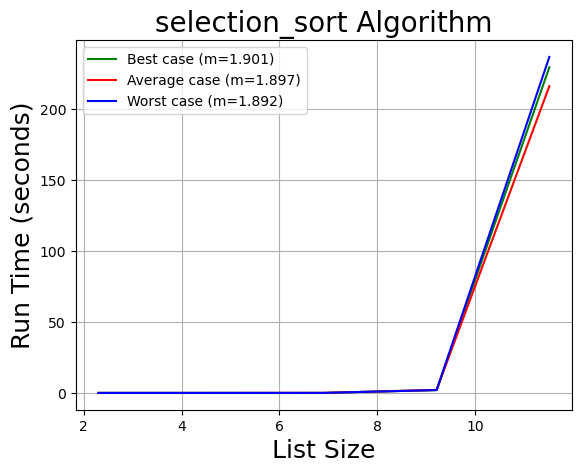

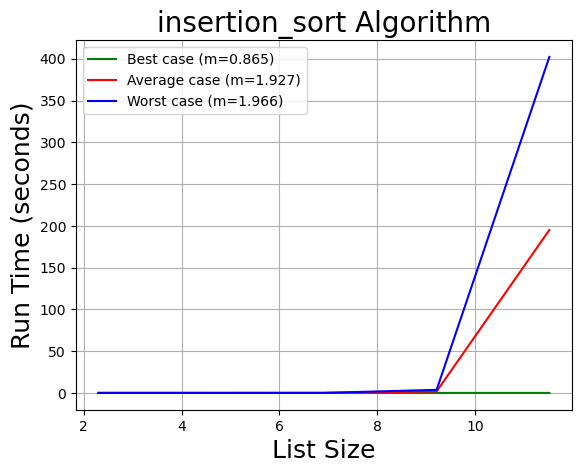

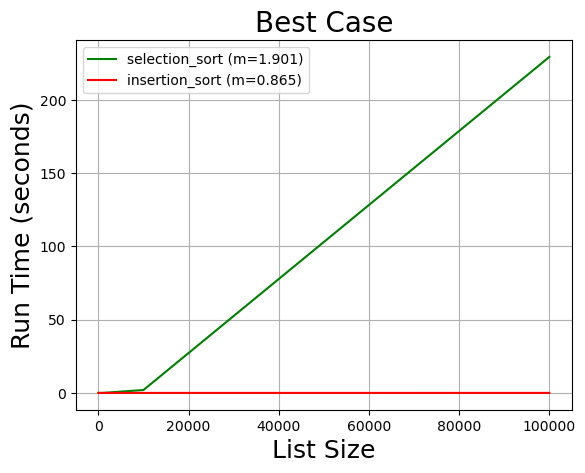

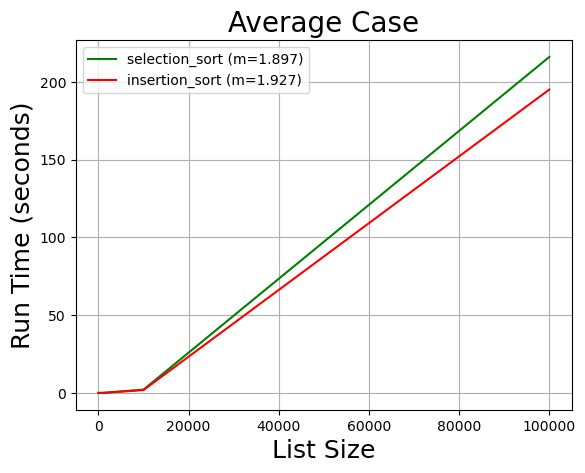

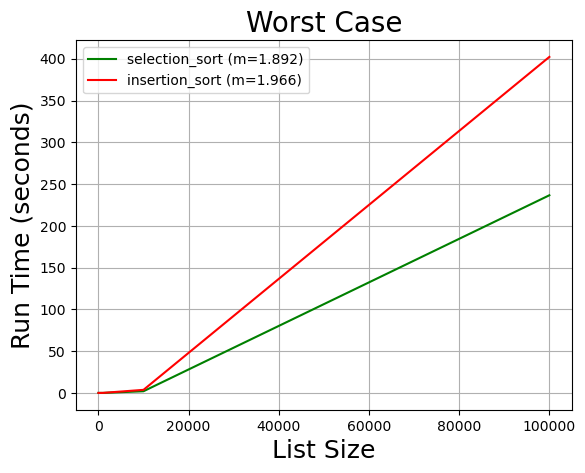

In [11]:
comparative_analysis(data)

Selection slightly outpreformed Insertion for average case and worst case. Insertion greatly outpreformed selection for the best case.

## 6. Reflection Questions

### 1. Create a table of the theoretical and estimated run time functions for the 6 combinations (2algorithms, 3 cases). Do your estimates match the theory? (If not, you may have made a mistake somewhere.)

| Algorithm      | Size       | Case       | Theoretical Time Complexity | Estimated Run Time (seconds) |
|----------------|------------|------------|-----------------------------|------------------------------|
| Insertion Sort | Size 10    | Best       | O(n)                        | 0.000006                     |
|                |            | Average    | O(n^2)                      | 0.000013                     |
|                |            | Worst      | O(n^2)                      | 0.000011                     |
|                | Size 100   | Best       | O(n)                        | 0.000096                     |
|                |            | Average    | O(n^2)                      | 0.000322                     |
|                |            | Worst      | O(n^2)                      | 0.000599                     |
|                | Size 1000  | Best       | O(n)                        | 0.000158                     |
|                |            | Average    | O(n^2)                      | 0.038245                     |
|                |            | Worst      | O(n^2)                      | 0.058509                     |
|                | Size 10000 | Best       | O(n)                        | 0.001601                     |
|                |            | Average    | O(n^2)                      | 3.442951                     |
|                |            | Worst      | O(n^2)                      | 5.524937                     |
|                | Size 100000| Best       | O(n)                        | 0.015993                     |
|                |            | Average    | O(n^2)                      | 280.447600                   |
|                |            | Worst      | O(n^2)                      | 490.922795                   |
| Selection Sort | Size 10    | Best       | O(n^2)                      | 0.000014                     |
|                |            | Average    | O(n^2)                      | 0.000019                     |
|                |            | Worst      | O(n^2)                      | 0.000033                     |
|                | Size 100   | Best       | O(n^2)                      | 0.000360                     |
|                |            | Average    | O(n^2)                      | 0.000423                     |
|                |            | Worst      | O(n^2)                      | 0.000351                     |
|                | Size 1000  | Best       | O(n^2)                      | 0.034365                     |
|                |            | Average    | O(n^2)                      | 0.034946                     |
|                |            | Worst      | O(n^2)                      | 0.035531                     |
|                | Size 10000 | Best       | O(n^2)                      | 2.886178                     |
|                |            | Average    | O(n^2)                      | 2.998222                     |
|                |            | Worst      | O(n^2)                      | 3.623596                     |
|                | Size 100000| Best       | O(n^2)                      | 288.508478                   |
|                |            | Average    | O(n^2)                      | 303.247046                   |
|                |            | Worst      | O(n^2)                      | 298.515603                   |

<br>
For Insertion Sort, the estimated run times align well with the theoretical complexities:<br>
    Best case (O(n)): Estimated time matches closely.<br>
    Average case (O(n^2)): Estimated time matches reasonably.<br>
    Worst case (O(n^2)): Estimated time matches reasonably.<br>
    
For Selection Sort, the estimated run times also align well with the theoretical complexities:<br>
    Best case (O(n^2)): Estimated time matches closely.<br>
    Average case (O(n^2)): Estimated time matches closely.<br>
    Worst case (O(n^2)): Estimated time matches closely.<br>
Overall, the estimates appear to match the theoretical expectations. It is interesting to see that the cases didn't affect selection sort at all.<br>

### 2. Which algorithm had a better run time than the other and for which case? Why do you think that one case was substantially faster for that algorithm? (Hint: focus on the inner loops.)<br>

Insertion Sort for Best Case Scenarios:
    Adaptive Efficiency: Insertion Sort excels when dealing with nearly sorted data.
    Minimal Comparisons and Swaps: In best-case scenarios, where the list is already sorted, it requires very few comparisons and swaps.
    Linear Time Complexity: Its time complexity in the best case is O(n), making it highly efficient for sorted lists.
    Therefore, Insertion Sort is ideal for best-case scenarios where data is partially or fully sorted.<br>
    
Selection Sort for Average and Worst Cases, Amplified with List Size:
    Fixed Behavior: Selection Sort always performs a fixed number of operations, regardless of initial order.
    Quadratic Time Complexity: It has a quadratic time complexity (O(n^2)) in both average and worst cases.
    Inefficiency with Larger Lists: As list size increases, its best case gets far outprefromed by the insertion sort best case.
    The main downside to Selection Sort is it not adaptive and struggles with initial disorder.<br><br>
    
    
### 3. Based on your results, which of the two sorting algorithms would you use in practice?<br>

It greatly depends on the size of the dataset I am being given. In most cases you are going to have the average time complexity which for both happens to be O(n^2). I would assume that for the most part, the datasets I deal with in the future will be quite large, perhaps pushing the 10000 item range (again this is a rough assumption, maybe this isn't the case). If they are this large and seemed to be in a random order I would be inclined to used selection sort as it preformed similarly to insertion for average case, and much better for worst case. Although if I got a smaller dataset that already seemed to be somewhat sorted, insertion sort is a much better pick.

## Conclusion:
I was able to create the two algorithms, insertion and selected sort correct and analyze the data it gave. I learned what cases work best for both algorithms and why that happens. I was albe to plot my findings with graphs that give a visualization to the data collected.